<a href="https://colab.research.google.com/github/Real1CM/MLassignment/blob/main/%E4%BD%9C%E4%B8%9A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!apt-get install unrar

!unrar x data.rar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from data.rar

Creating    data                                                      OK
Creating    data/train                                                OK
Creating    data/train/image                                          OK
Extracting  data/train/image/0.png                                         2%  OK 
Extracting  data/train/image/1.png                                         5%  OK 
Extracting  data/train/image/10.png                                        8%  OK 
Extracting  data/train/image/11.png                                       11%  OK 
Extracting  data/train/image/12.png                                       14%  OK 
Extractin

In [15]:
import os
import cv2
import numpy as np

# 定义路径
train_image_path = './data/train/image/'
train_label_path = './data/train/label/'
val_image_path = './data/val/image/'
val_label_path = './data/val/label/'

def load_data(image_path, label_path):
    images = []
    labels = []

    for img_file in os.listdir(image_path):
        img = cv2.imread(os.path.join(image_path, img_file), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            # Resize image to 128x128
            img = cv2.resize(img, (128, 128))
            images.append(img)

    for label_file in os.listdir(label_path):
        label = cv2.imread(os.path.join(label_path, label_file), cv2.IMREAD_GRAYSCALE)
        if label is not None:
            # Resize label to 128x128
            label = cv2.resize(label, (128, 128))
            labels.append(label)

    return np.array(images), np.array(labels)

# 加载训练和验证数据
x_train, y_train = load_data(train_image_path, train_label_path)
x_val, y_val = load_data(val_image_path, val_label_path)

# 归一化图像
x_train = x_train[..., np.newaxis] / 255.0  # 添加通道维并归一化
y_train = y_train[..., np.newaxis] / 255.0    # 添加通道维并归一化
x_val = x_val[..., np.newaxis] / 255.0
y_val = y_val[..., np.newaxis] / 255.0

# 查看图像和掩膜的形状
print(f'Train Images shape: {x_train.shape}, Train Masks shape: {y_train.shape}')
print(f'Validation Images shape: {x_val.shape}, Validation Masks shape: {y_val.shape}')

Train Images shape: (28, 128, 128, 1), Train Masks shape: (28, 128, 128, 1)
Validation Images shape: (2, 128, 128, 1), Validation Masks shape: (2, 128, 128, 1)


In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_model(input_size=(128, 128, 1)):
    inputs = layers.Input(input_size)

    # 编码器部分
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # 解码器部分
    u2 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(p2)
    u2 = layers.concatenate([u2, c2])
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u2)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)

    u3 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c3)
    u3 = layers.concatenate([u3, c1])
    c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u3)
    c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c4)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c4)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# 实例化模型
model = unet_model(input_size=(128, 128, 1))  # 可以根据需要修改输入大小
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 128, 128, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_27 (Conv2D)        │ (None, 128, 128, 64)   │            640 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_28 (Conv2D)        │ (None, 128, 128, 64)   │         36,928 │ conv2d_27[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 64, 64, 64)     │              0 │ conv2d_28[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_29 (Conv2D)        │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_30 (Conv2D)        │ (None, 64, 64, 128)    │        147,584 │ conv2d_29[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 32, 32, 128)    │              0 │ conv2d_30[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_6        │ (None, 64, 64, 128)    │         65,664 │ max_pooling2d_7[0][0]  │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_6             │ (None, 64, 64, 256)    │              0 │ conv2d_transpose_6[0]… │
│ (Concatenate)             │                        │                │ conv2d_30[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_31 (Conv2D)        │ (None, 64, 64, 128)    │        295,040 │ concatenate_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_32 (Conv2D)        │ (None, 64, 64, 128)    │        147,584 │ conv2d_31[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_7        │ (None, 128, 128, 64)   │         32,832 │ conv2d_32[0][0]        │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_7             │ (None, 128, 128, 128)  │              0 │ conv2d_transpose_7[0]… │
│ (Concatenate)             │                        │                │ conv2d_28[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_33 (Conv2D)        │ (None, 128, 128, 64)   │         73,792 │ concatenate_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_34 (Conv2D)        │ (None, 128, 128, 64)   │         36,928 │ conv2d_33[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_35 (Conv2D)        │ (None, 128, 128, 1)    │             65 │ conv2d_34[0][0]        │
└──────────────────────

 Total params: 910,913 (3.47 MB)

 Trainable params: 910,913 (3.47 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# 设置训练参数
epochs = 20
batch_size = 8

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 6s/step - accuracy: 0.7329 - loss: 0.6404 - val_accuracy: 0.7745 - val_loss: 0.4640
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.7382 - loss: 0.5178 - val_accuracy: 0.7745 - val_loss: 0.4625
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 7s/step - accuracy: 0.7372 - loss: 0.5061 - val_accuracy: 0.7745 - val_loss: 0.4479
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.7391 - loss: 0.4996 - val_accuracy: 0.7745 - val_loss: 0.4566
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 6s/step - accuracy: 0.7378 - loss: 0.4938 - val_accuracy: 0.7745 - val_loss: 0.4359
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 43s 6s/step - accuracy: 0.7365 - loss: 0.4851 - val_accuracy: 0.7745 - val_loss: 0.4333
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.7395 - loss: 0.4672 - val_accuracy: 0.7745 - val_loss: 0.4041
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.7383 - loss: 0.4447 - val_accuracy: 0.7747 - val_loss: 0.3876
Epoch 9/

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


IndexError: index 2 is out of bounds for axis 0 with size 2

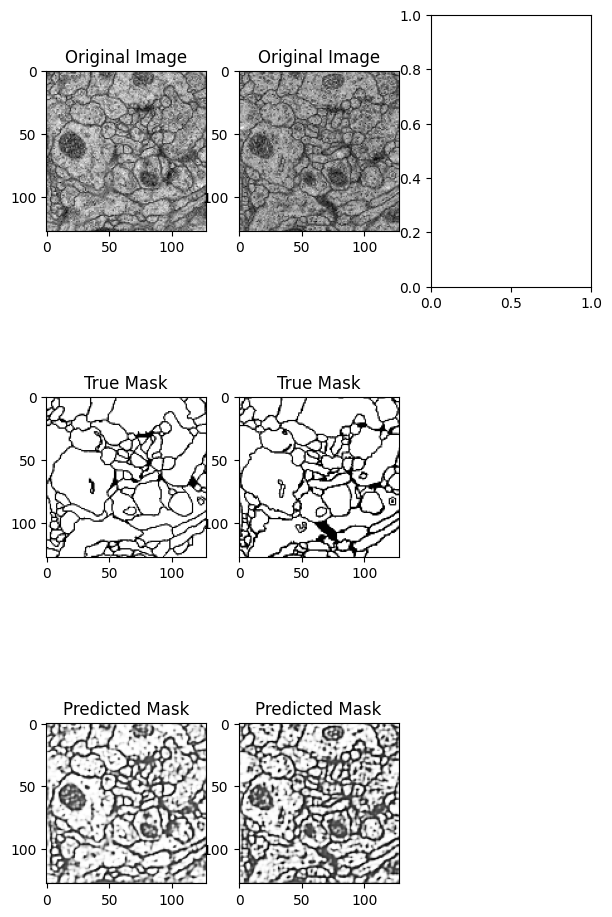

In [18]:
import matplotlib.pyplot as plt

# 预测
preds = model.predict(x_val)

# 可视化
plt.figure(figsize=(12, 12))
for i in range(5):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_val[i].squeeze(), cmap='gray')
    plt.title("Original Image")

    plt.subplot(3, 5, i + 6)
    plt.imshow(y_val[i].squeeze(), cmap='gray')
    plt.title("True Mask")

    plt.subplot(3, 5, i + 11)
    plt.imshow(preds[i].squeeze(), cmap='gray')
    plt.title("Predicted Mask")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


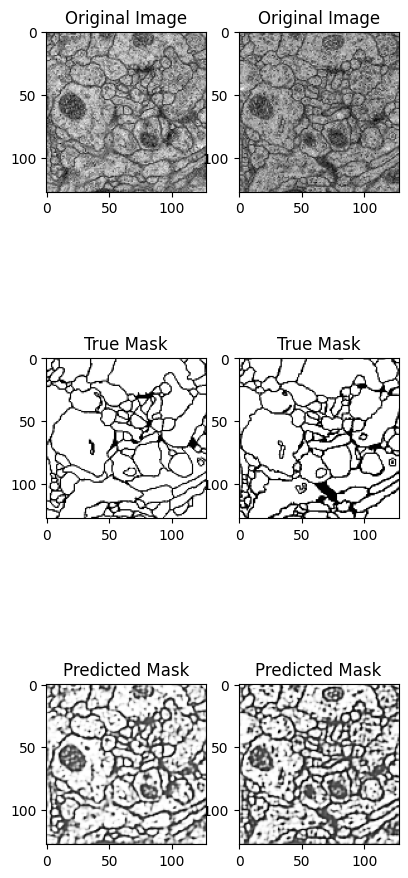

In [19]:
import matplotlib.pyplot as plt

# 预测
preds = model.predict(x_val)

# 可视化
num_images_to_display = min(5, x_val.shape[0]) # Get the minimum between 5 and the actual number of images in x_val

plt.figure(figsize=(12, 12))
for i in range(num_images_to_display):  # Iterate through the available images
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_val[i].squeeze(), cmap='gray')
    plt.title("Original Image")

    plt.subplot(3, 5, i + 6)
    plt.imshow(y_val[i].squeeze(), cmap='gray')
    plt.title("True Mask")

    plt.subplot(3, 5, i + 11)
    plt.imshow(preds[i].squeeze(), cmap='gray')
    plt.title("Predicted Mask")
plt.show()